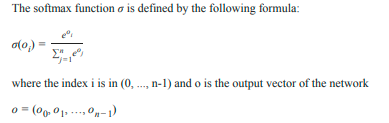

In [1]:
import numpy as np

def softmax(x):
    #"apply softmax to an input x
    e_x = np.exp(x)
    return e_x / e_x.sum()

x = np.array([1, 0, 3, 5])
y = softmax(x)
y, x / x.sum()

(array([0.01578405, 0.00580663, 0.11662925, 0.86178007]),
 array([0.11111111, 0.        , 0.33333333, 0.55555556]))

In [2]:
import numpy as np
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()
s = softmax(np.array([0, 4, 5]))

si_sj = - s * s.reshape(3, 1)
print(s)
print(si_sj)
s_der = np.diag(s) + si_sj
s_der

[0.00490169 0.26762315 0.72747516]
[[-2.40265555e-05 -1.31180548e-03 -3.56585701e-03]
 [-1.31180548e-03 -7.16221526e-02 -1.94689196e-01]
 [-3.56585701e-03 -1.94689196e-01 -5.29220104e-01]]


array([[ 0.00487766, -0.00131181, -0.00356586],
       [-0.00131181,  0.196001  , -0.1946892 ],
       [-0.00356586, -0.1946892 ,  0.19825505]])

In [3]:
import numpy as np
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

class NeuralNetwork:
    def __init__(self,
                    no_of_in_nodes,
                    no_of_out_nodes,
                    no_of_hidden_nodes,
                    learning_rate,
                    softmax=True):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.softmax = softmax
        self.create_weight_matrices()
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neur
        al network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))
        
    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuples, lists or nda
        rrays
        """
        # make sure that the vectors have the right shape
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)
        output_vector_hidden = sigmoid(self.weights_in_hidden @ input_vector)
        if self.softmax:
            output_vector_network = softmax(self.weights_hidden_out @ output_vector_hidden)
        else:
            output_vector_network = sigmoid(self.weights_hidden_out @ output_vector_hidden)
        
        output_error = target_vector - output_vector_network
        if self.softmax:
            ovn = output_vector_network.reshape(output_vector_network.size,)
            si_sj = - ovn * ovn.reshape(self.no_of_out_nodes, 1)
            s_der = np.diag(ovn) + si_sj
            tmp = s_der @ output_error
            self.weights_hidden_out += self.learning_rate * (tmp@ output_vector_hidden.T)
        else:
            tmp = output_error * output_vector_network * (1.0 - output_vector_network)
            self.weights_hidden_out += self.learning_rate * (tmp@ output_vector_hidden.T)
            
        # calculate hidden errors:
        hidden_errors = self.weights_hidden_out.T @ output_error
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T) 
        
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'.
        'input_vector' can be tuple, list or ndarray
        """
        # make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = sigmoid(self.weights_in_hidden @ input_vector)

        if self.softmax:
            output_vector_network = softmax(self.weights_hidden_out @ input4hidden)
        else:
            output_vector_network = sigmoid(self.weights_hidden_out @ input4hidden)
        return output_vector_network
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [5]:
from sklearn.datasets import make_blobs
n_samples = 300
samples, labels = make_blobs(n_samples=n_samples,centers=([2, 6], [6, 2]),random_state=0)

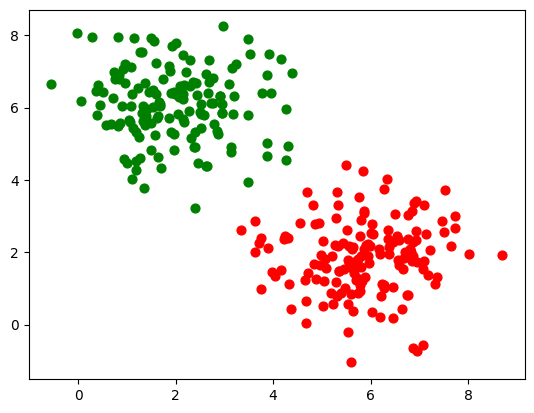

In [6]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],c=colours[n_class], s=40, label=str(n_class))

size_of_learn_sample = int(n_samples * 0.8)
learn_data = samples[:size_of_learn_sample]
test_data = samples[-size_of_learn_sample:]

In [8]:
#from neural_networks_softmax import NeuralNetwork
simple_network = NeuralNetwork(no_of_in_nodes=2,
                                no_of_out_nodes=2,
                                no_of_hidden_nodes=5,
                                learning_rate=0.3,
                                softmax=True)

In [9]:
for x in [(1, 4), (2, 6), (3, 3), (6, 2)]:
    y = simple_network.run(x)
    print(x, y, s.sum())


(1, 4) [[0.3965801]
 [0.6034199]] 1.0
(2, 6) [[0.37050139]
 [0.62949861]] 1.0
(3, 3) [[0.3545266]
 [0.6454734]] 1.0
(6, 2) [[0.31840017]
 [0.68159983]] 1.0


In [10]:
labels_one_hot = (np.arange(2) == labels.reshape(labels.size, 1))
labels_one_hot = labels_one_hot.astype(np.float)

for i in range(size_of_learn_sample):
    #print(learn_data[i], labels[i], labels_one_hot[i])
    simple_network.train(learn_data[i],labels_one_hot[i])

from collections import Counter
evaluation = Counter()
simple_network.evaluate(learn_data, labels)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\4050529347.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_one_hot = labels_one_hot.astype(np.float)


(236, 4)